# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [6]:
pip install pandas requests lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import io
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



Rows inserted: 100


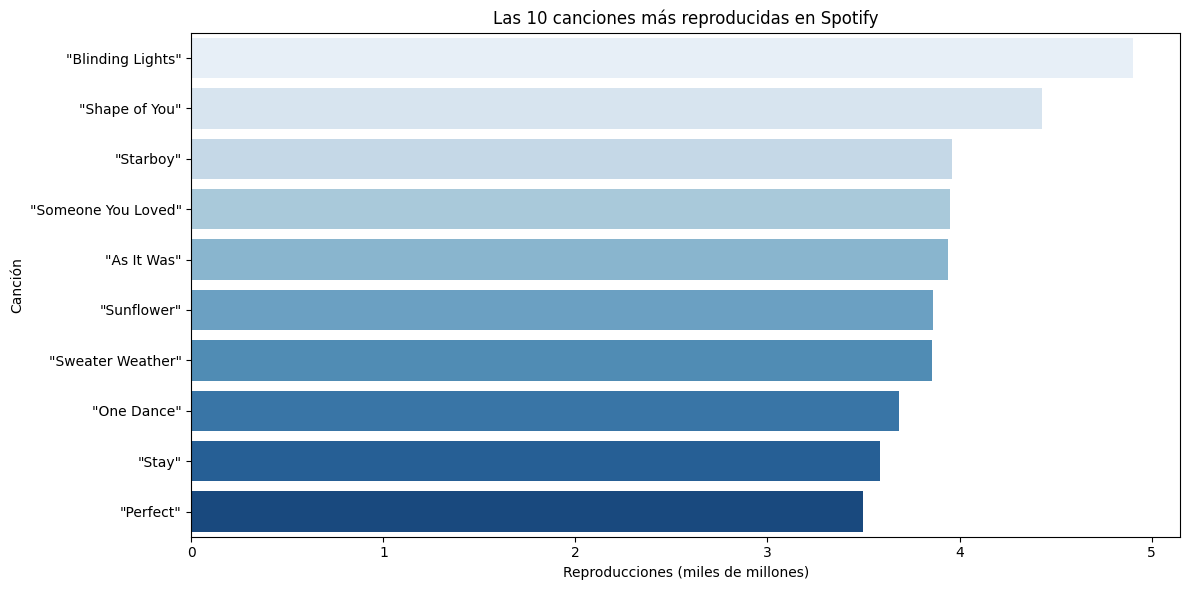

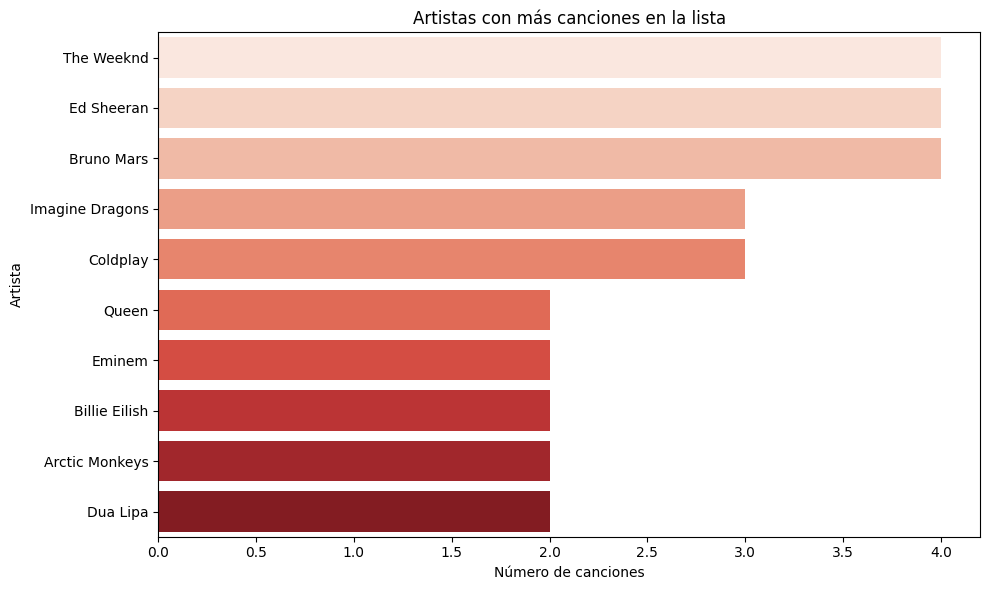

In [17]:
# Realizaremos la busqueda de las canciones mas reproducidas en el siguiente codigo

# Buscar el HTML ponemos el codigo de la página
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url)

# Extraer las tablas con pandas
html = io.StringIO(response.text)
tables = pd.read_html(html)

# Selecciomar la tabla 
df = tables[0]

# Verificar las primeras filas de la tabla para verificar su estructura
df.head()

# Asignamos nombres a las columnas
df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]

# Limpiamos datos
df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()

# Convertir Streams a numeros flotantes
df["Streams (billions)"] = df["Streams (billions)"].astype(float)

# Crear la base de datos SQLite y guardar los datos
conn = sqlite3.connect("spotify_top_songs.db")
df.to_sql("top_songs", conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM top_songs")
print("Rows inserted:", cursor.fetchone()[0])
conn.commit()
conn.close()

# Grafico 1: Las 10 canciones mas reproducidas
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="Blues", legend=False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (miles de millones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()

# Grafico 2: Numero de canciones por artista
artists = df["Artist"].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=artists.values, y=artists.index, hue=artists.index, palette="Reds", legend=False)
plt.title("Artistas con más canciones en la lista")
plt.xlabel("Número de canciones")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()

# Conclusiones:
# Este codigo proporciona una lista de las 10 canciones mas reproducidas en spotify y el numero de canciones por artistas